In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv(r"/Advertising.csv")

In [13]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [32]:
df=df.iloc[0:,1:5]

In [33]:
##We will see relationship between target variables and Independent Variables

Text(0, 0.5, 'Sales')

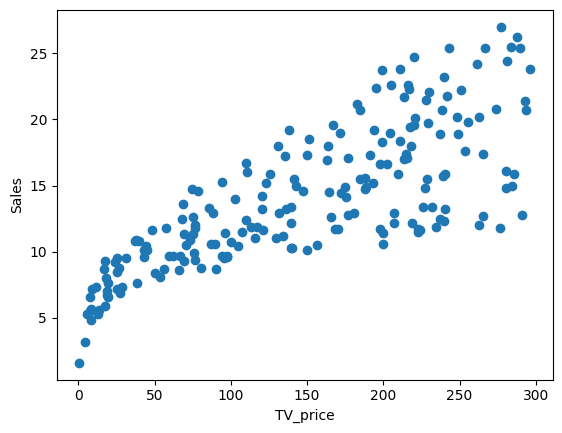

In [34]:
plt.scatter(df["TV"],df["sales"])
plt.xlabel("TV_price")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

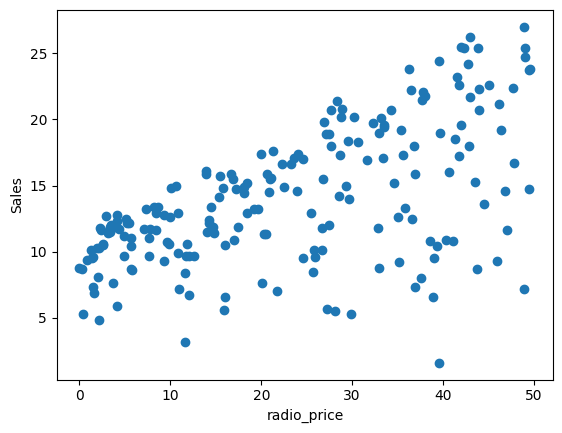

In [35]:
plt.scatter(df["radio"],df["sales"])
plt.xlabel("radio_price")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

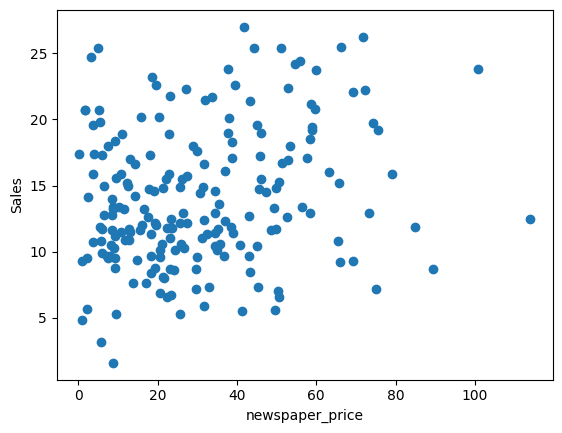

In [36]:
plt.scatter(df["newspaper"],df["sales"])
plt.xlabel("newspaper_price")
plt.ylabel("Sales")

In [37]:
## we can use correlation matrix also
correlation_matrix=df.corr()
correlation_matrix

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

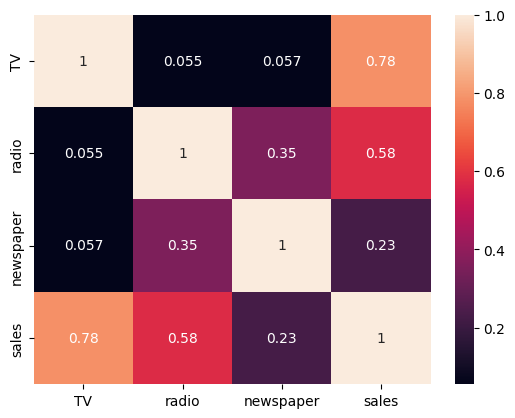

In [40]:
sns.heatmap(correlation_matrix,annot=True)

In [41]:
##we can see there is positive relationship between Tv, Radio and Sales Value so we will use only two features for prediction

In [43]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
#there is no any missing values and duplicate values present in our dataset

In [114]:
## Independent Features
X=df.iloc[0:,0:2]
X

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [115]:
##Target Feature
y=df.iloc[0:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [116]:
##model creation


In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
lr=LinearRegression()

In [152]:
lr.fit(X_train,y_train)  ## Training Model with xtrain and ytrain

LinearRegression()

In [121]:
X_test

,TV,radio
112,175.7,15.4
29,70.6,16.0
182,56.2,5.7
199,232.1,8.6
193,166.8,42.0
85,193.2,18.4
10,66.1,5.8
54,262.7,28.8
115,75.1,35.0
35,290.7,4.1


In [122]:
y_test

112    14.1
29     10.5
182     8.7
199    13.4
193    19.6
85     15.2
10      8.6
54     20.2
115    12.6
35     12.8
12      9.2
92     19.4
13      9.7
126     6.6
174    11.5
2       9.3
44      8.5
3      18.5
113    15.9
14     19.0
23     15.5
25     12.0
6      11.8
134    10.8
165    11.9
173    11.7
45     14.9
65      9.3
48     14.8
122    11.6
178    11.8
64     18.0
9      10.6
57     13.2
78      5.3
71     12.4
128    24.7
176    20.2
131    12.7
53     21.2
137    20.8
163    18.0
111    21.8
123    15.2
109    19.8
141    19.2
41     17.1
130     1.6
140    10.9
5       7.2
159    12.9
100    11.7
11     17.4
187    17.3
24      9.7
89     16.7
66      9.5
8       4.8
172     7.6
175    27.0
Name: sales, dtype: float64

In [123]:
X_test.iloc[0:1,0:2]

,TV,radio
112,175.7,15.4


In [124]:
y_pred=lr.predict(X_test)

In [125]:
lr.predict(X_test.iloc[0:1,0:2].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.11270167])

In [126]:
X_test.iloc[1:2,0:2]  ##in y test the  answer of 29 th row is 10.5 that mean if we give TV and radio value then asnwer should be 10.5


,TV,radio
29,70.6,16.0


In [127]:
lr.predict(X_test.iloc[1:2,0:2].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.42934607])

In [128]:
lr.predict(X_test.iloc[3:4,0:2].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.43797745])

In [129]:
m=lr.coef_
m

array([0.04560786, 0.18338343])

In [130]:
c=lr.intercept_
c

3.2752966321846735

In [131]:
#y=mx+c
0.047*175.7	+0.175*15.4+3.12

14.0729

In [132]:
##Model Evaluation

In [133]:
#1.MAE ( Mean Absolute Error)
# Here we have to calculate each datapoint error that our model have done ,that means each data point distance from best fit line
##Advantages
## Same unit like ouput's unit
## Robust to outlier

##Disdvantages
##Not Differentiable

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))


MAE 1.4765353749743846


In [134]:
#2.MSE ( Mean Squres Error)
# Here we have to calculate each datapoint error that our model have done ,that means each data point distance from best fit line and after then we take sqare

#Advantage
## Loss function for LR
## Differentiable


##Disdvantages
##Not same unit MSE value will the squred value of output
## Penalize outliers

print("MSE",mean_squared_error(y_test,y_pred))


MSE 4.8606834866365345


In [135]:

#3.RMSE ( Root Mean Squres Error)
# Here we have to calculate each datapoint error that our model have done ,that means each data point distance from best fit line and after then we take root sqare

#Advantage
## Same unit
## Differentiable


# Disdvantages
## Robust to outliers

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE 2.2046957809721808


In [141]:
#4.R2 Score ( Coeff of ditermination,goodness of fit)
# Here we compare Our linear regression line with Mean Line..and we deside that whether our Liner best fit line is better or not
# R2=1-(SSR/SSM)
# SSR=Sum of Squred error in LR and SSM Sum of Squred Error in the mean line
# Ranges from[0 1]
#when R2=0 means our (SSR/SSM) term is 1 that means our Mean line and Regression Line doing same error so our model is performing worst
#when R2=1 means our (SSR/SSM) term is 0, when this will be 0?  when SSR is zero ,that means our Regression Line doing 0 error so our model is performing well.



## what if R2 score is Negative? Is it Possible?
##Yes, it is possible ..when our (SSR/SSM) value will be > 1 obviously our R2 will negative and our SSR value is SSM ,that means our Regression Line doing error that are > that mean line
## When It is possible? when we apply algorithms without data understanding ,like ur data is highky non linear and you have applied linear reg
## e.g.  R2=0.80, means our IV(here TV and radio) explains 80% variance. ..but what about remaining 20%? we cant expalin this 20 % variance.
R2score=r2_score(y_test,y_pred)

print("R2score :",R2score)

R2score : 0.8087812892543276


In [137]:
#5. Adusted R2 Score

##suppose we have Dataset which has feature like CGPA, IQ and we have to predict Package ..if we add another feature which is not relevant Like Temprature
## As we increase the Features t then Our R2 score will increase. bt sometimes we add features that are not relevent even our R2 score will increase which is  not good.
## So in this situation Adusted R2 Score will comes into picture.
##  Adusted R2 Score=1-[(1-R2)(n-1)/(n-1-k)]
## n=no.of rows ,k=total no.of. independent columns

##Let see how it works
## suppose we add feature then our k will increase that means (n-1-k) decrease and (n-1) will be constant, R2 will be slightly increse or will be constant
##let say our (1-R2)(n-1) is constant ,that means  numerator is constant and deno is decreasing so [(1-R2)(n-1)/(n-1-k)] is increasing
## So 1-[(1-R2)(n-1)/(n-1-k)] will be decrease, that means Whenever we add Irrelevant feature then our adjusted R2 will < than R2


In [138]:
X_test.shape

(60, 2)

In [144]:
Adusted_R2_Score=1-((1-R2score)*(60-1)/(60-1-1))
Adusted_R2_Score

0.8054844149311263